# Keras MNIST

Based on the Mnist example from <https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py>.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

Get the data:

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Check image dimensions, and a few example images:

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


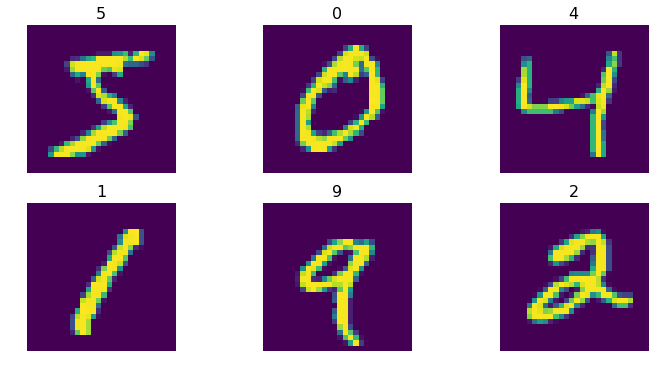

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

f = plt.figure(figsize=(12,6))
for i in range(6):
    sp = f.add_subplot(2, 3, i+1)
    sp.axis('Off')
    sp.set_title(y_train[i], fontsize=16)
    plt.imshow(x_train[i])

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to one-hot-encoded class matrices:

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
print(type(y_test))
print(y_test.shape)
print(y_test[:3,:])

<class 'numpy.ndarray'>
(10000, 10)
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Build the model:

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(), metrics=['accuracy'])

In [11]:
batch_size = 128
epochs = 20

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.2469 - acc: 0.9236 - val_loss: 0.1067 - val_acc: 0.9661
Epoch 2/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.1043 - acc: 0.9678 - val_loss: 0.0816 - val_acc: 0.9769
Epoch 3/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0750 - acc: 0.9773 - val_loss: 0.0802 - val_acc: 0.9783
Epoch 4/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0607 - acc: 0.9818 - val_loss: 0.0758 - val_acc: 0.9781
Epoch 5/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0524 - acc: 0.9843 - val_loss: 0.0743 - val_acc: 0.9805
Epoch 6/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0432 - acc: 0.9873 - val_loss: 0.1103 - val_acc: 0.9739
Epoch 7/20
60000/60000 [==============================] - 2s 28us/step - loss: 0.0357 - acc: 0.9889 - val_loss: 0.0797 - val_acc

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10423951952059726
Test accuracy: 0.9837


Look at some of the predictions on the test data:

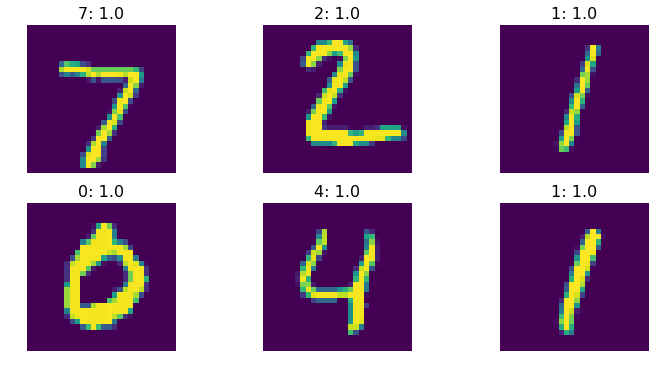

In [13]:
first_6_pred = model.predict(x_test[:6, :])

f = plt.figure(figsize=(12,6))
for i in range(6):
    sp = f.add_subplot(2, 3, i+1)
    sp.axis('Off')
    pred_class = np.argmax(first_6_pred[i, :])
    max_prob = np.max(first_6_pred[i, :])
    sp.set_title("{}: {}".format(pred_class, max_prob), fontsize=16)
    plt.imshow(x_test[i].reshape(28, 28))

Look at some incorrect predictions:

In [14]:
test_pred = model.predict(x_test)
n_test = x_test.shape[0]
misclassified = []

for i in range(n_test):
    if np.argmax(test_pred[i, :]) != np.argmax(y_test[i, :]):
        misclassified.append(i)
        
print(misclassified)
print(len(misclassified))

[149, 151, 321, 326, 340, 359, 445, 456, 495, 582, 619, 646, 659, 720, 882, 900, 947, 951, 956, 1014, 1039, 1107, 1112, 1156, 1178, 1181, 1182, 1226, 1242, 1247, 1260, 1319, 1328, 1393, 1522, 1530, 1549, 1621, 1681, 1721, 1813, 1878, 1901, 2004, 2024, 2035, 2053, 2070, 2093, 2109, 2135, 2224, 2293, 2369, 2387, 2414, 2462, 2488, 2597, 2607, 2648, 2654, 2720, 2743, 2810, 2863, 2877, 2921, 2927, 2939, 2953, 3073, 3117, 3225, 3289, 3422, 3441, 3460, 3475, 3503, 3520, 3558, 3597, 3681, 3762, 3776, 3780, 3808, 3818, 3853, 3869, 3893, 3906, 3968, 3985, 4027, 4065, 4102, 4140, 4176, 4199, 4248, 4360, 4425, 4497, 4505, 4536, 4551, 4571, 4578, 4668, 4731, 4759, 4761, 4807, 4823, 4880, 5331, 5600, 5634, 5642, 5649, 5654, 5734, 5937, 5955, 5972, 5973, 5997, 6011, 6023, 6059, 6166, 6571, 6574, 6576, 6577, 6597, 6625, 6651, 6755, 6847, 7216, 7915, 7921, 8059, 8094, 8198, 8311, 8325, 8527, 9009, 9015, 9024, 9587, 9634, 9664, 9679, 9729, 9768, 9770, 9808, 9940]
163


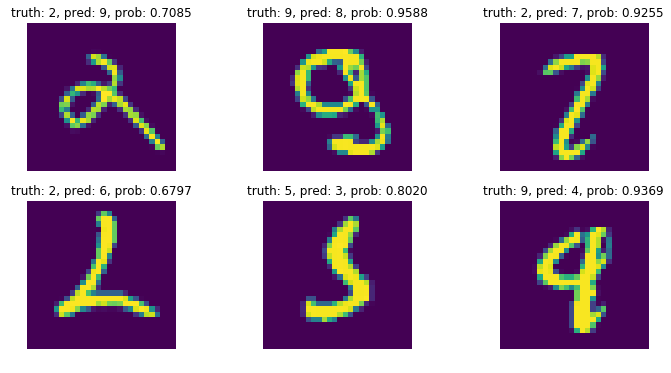

In [15]:
first_6_misclassified = misclassified[:6]

f = plt.figure(figsize=(12,6))
for i in range(6):
    sp = f.add_subplot(2, 3, i+1)
    img_id = first_6_misclassified[i]
    sp.axis('Off')
    pred_class = np.argmax(test_pred[img_id, :])
    max_prob = np.max(test_pred[img_id, :])
    ground_truth = np.argmax(y_test[img_id, :])
    sp.set_title("truth: {}, pred: {}, prob: {:.4f}".format(ground_truth, pred_class, max_prob), fontsize=12)
    plt.imshow(x_test[img_id].reshape(28, 28))